# Assignment 01 — Loading & Visualizing Data  
Dataset:NYC DOT Bike Routes (NYC Open Data)

Goal (per assignment): Load a dataset; explore metadata/attributes; pick 1–2 attributes; make map and non‑map visualizations; add inline notes that explain why I chose these attributes and what they can/can’t tell us.


In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def set_axis_off():
    plt.rcParams["axes.spines.left"] = False
    plt.rcParams["axes.spines.right"] = False
    plt.rcParams["axes.spines.top"] = False
    plt.rcParams["axes.spines.bottom"] = False
    plt.rcParams["xtick.bottom"] = False
    plt.rcParams["ytick.left"] = False

set_axis_off()


## Load data
Notes (why this dataset): NYC bike infrastructure is a good proxy for mobility/access. It’s clean line geometry with useful attributes like facility type and borough. That lets me compare what the infrastructure is and where it is without heavy cleaning.


In [2]:
shp_path = r"C:\Users\vvbor\Documents\GitHub\cdp_mapping_systems_assignments\New York City Bike Routes_20250808\geo_export_14e0fd36-223b-4837-95c6-8f02fcfc8e50.shp"
gdf = gpd.read_file(shp_path)
gdf.head()


,segmentid,version,bikeid,prevbikeid,status,boro,street,fromstreet,tostreet,onoffst,...,ft_facilit,tf_facilit,ft2facilit,tf2facilit,date_instd,time_instd,date_ret_d,time_ret_d,shape_leng,geometry
0,2579.0,23c,6562.0,NA,Current,5.0,HYLAN BLVD,HOLTEN AV,LUTEN AV,ON,...,Curbside,Curbside,None,None,2007-10-01,00:00:00.000,NaT,None,996.048465,"LINESTRING (-74.19243 40.52174, -74.19519 40.52)"
1,5033.0,23c,4272.0,None,Current,5.0,MERRYMOUNT ST,RICHMOND HILL RD,ROCKLAND AV,ON,...,Buffered,Buffered,None,None,2021-08-12,00:00:00.000,NaT,None,435.595483,"LINESTRING (-74.16031 40.58903, -74.16126 40.5..."
2,10186.0,23c,2107.0,NA,Current,5.0,CLOVE ROAD,RICHMOND TERR,FOREST AVE,ON,...,Sharrows,Sharrows,None,None,2015-09-11,00:00:00.000,NaT,None,517.646046,"LINESTRING (-74.12632 40.63525, -74.12596 40.6..."
3,20716.0,23c,942.0,NA,Current,3.0,5 AV,23 ST,50 ST,ON,...,Sharrows,Sharrows,None,None,2013-07-02,00:00:00.000,NaT,None,260.532862,"LINESTRING (-74.00974 40.64567, -74.01032 40.6..."
4,126857.0,23c,951.0,NA,Current,3.0,6 AVENUE,67 ST,FT HAMILTON PKWY,ON,...,Sharrows,Sharrows,None,None,2015-06-29,00:00:00.000,NaT,None,83.659761,"LINESTRING (-74.02089 40.62654, -74.02099 40.6..."


## Explore metadata & attributes
Notes: I scan columns, dtypes, CRS, and size. I want categorical fields that tell a quick story here, facility type (infrastructure class) and borough (spatial grouping).


In [3]:
print("Rows, Cols:", gdf.shape)
print("CRS:", gdf.crs)
gdf.columns.to_list(), list(gdf.dtypes)


Rows, Cols: (27673, 24)
CRS: EPSG:4326


(['segmentid',
  'version',
  'bikeid',
  'prevbikeid',
  'status',
  'boro',
  'street',
  'fromstreet',
  'tostreet',
  'onoffst',
  'facilitycl',
  'allclasses',
  'bikedir',
  'lanecount',
  'ft_facilit',
  'tf_facilit',
  'ft2facilit',
  'tf2facilit',
  'date_instd',
  'time_instd',
  'date_ret_d',
  'time_ret_d',
  'shape_leng',
  'geometry'],
 [dtype('float64'),
  dtype('O'),
  dtype('float64'),
  dtype('O'),
  dtype('O'),
  dtype('float64'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('float64'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('O'),
  dtype('<M8[ms]'),
  dtype('O'),
  dtype('<M8[ms]'),
  dtype('O'),
  dtype('float64'),
  <geopandas.array.GeometryDtype at 0x18d8caca530>])

## Pick attributes
Notes (choice): I’m choosing facility type (what kind of bike facility) and borough (where it is).
- Facility type - mix of protected vs. shared lanes.
- Borough - distribution across the city.
Limitation: segment counts ≠ coverage. I’ll also compute total length by group.


In [4]:
[c for c in gdf.columns if any(k in c.lower() for k in ["facil", "class", "type"])],
[c for c in gdf.columns if any(k in c.lower() for k in ["boro", "borough"])]


['boro']

In [5]:
facility_col = "facilitytype"  # change if your export uses 'class' or 'facilitycl'
borough_col  = "borough"       # change to 'boro' if needed

assert facility_col in gdf.columns
assert borough_col in gdf.columns


AssertionError: 

In [6]:
gdf.columns.to_list() # check if the columns are present


['segmentid',
 'version',
 'bikeid',
 'prevbikeid',
 'status',
 'boro',
 'street',
 'fromstreet',
 'tostreet',
 'onoffst',
 'facilitycl',
 'allclasses',
 'bikedir',
 'lanecount',
 'ft_facilit',
 'tf_facilit',
 'ft2facilit',
 'tf2facilit',
 'date_instd',
 'time_instd',
 'date_ret_d',
 'time_ret_d',
 'shape_leng',
 'geometry']

In [ ]:
facility_col = "facilitycl" # change if your export uses 'class' or 'facilitytype
borough_col = "boro" # change to 'boro' if needed

assert facility_col in gdf.columns
assert borough_col in gdf.columns # check if the columns are present


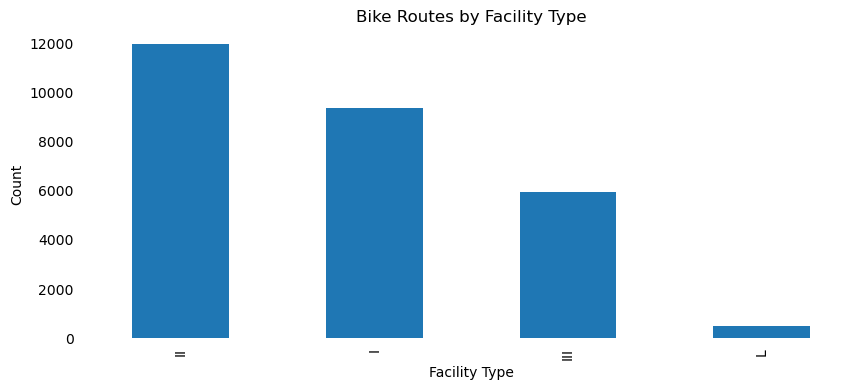

In [ ]:
gdf[facility_col].value_counts().plot(kind="bar", figsize=(10,4)) # bar chart of facility types
plt.title("Bike Routes by Facility Type") # bar chart of facility types
plt.xlabel("Facility Type"); plt.ylabel("Count") # bar chart of facility types
plt.show() # bar chart of facility types


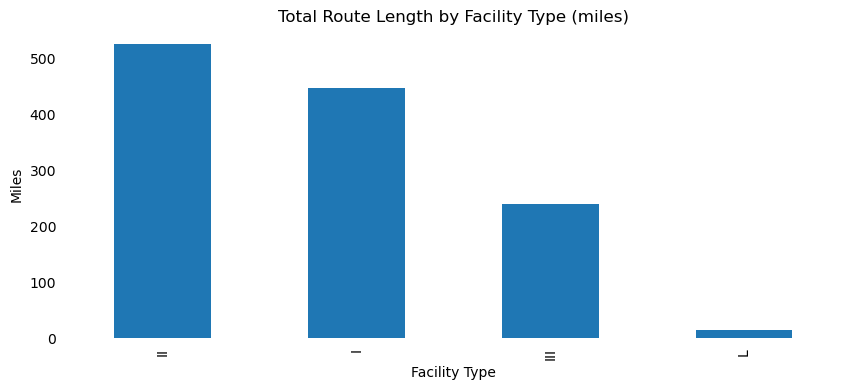

In [9]:
gdf_ft = gdf.to_crs(2263)  # NY State Plane (feet)
length_miles_by_fac = (gdf_ft.length/5280).groupby(gdf[facility_col]).sum().sort_values(ascending=False)
length_miles_by_fac.plot(kind="bar", figsize=(10,4))# bar chart of total route length by facility type
plt.title("Total Route Length by Facility Type (miles)")
plt.xlabel("Facility Type"); plt.ylabel("Miles")
plt.show()# bar chart of total route length by facility type


Interpretation: Counts show relative prevalence of facility types, but can overweight many short segments. Length in miles better reflects coverage experienced on the ground.  
Cannot tell: nothing here includes safety, speed, traffic stress, grade, or maintenance—so “more miles” ≠ “better” without context.


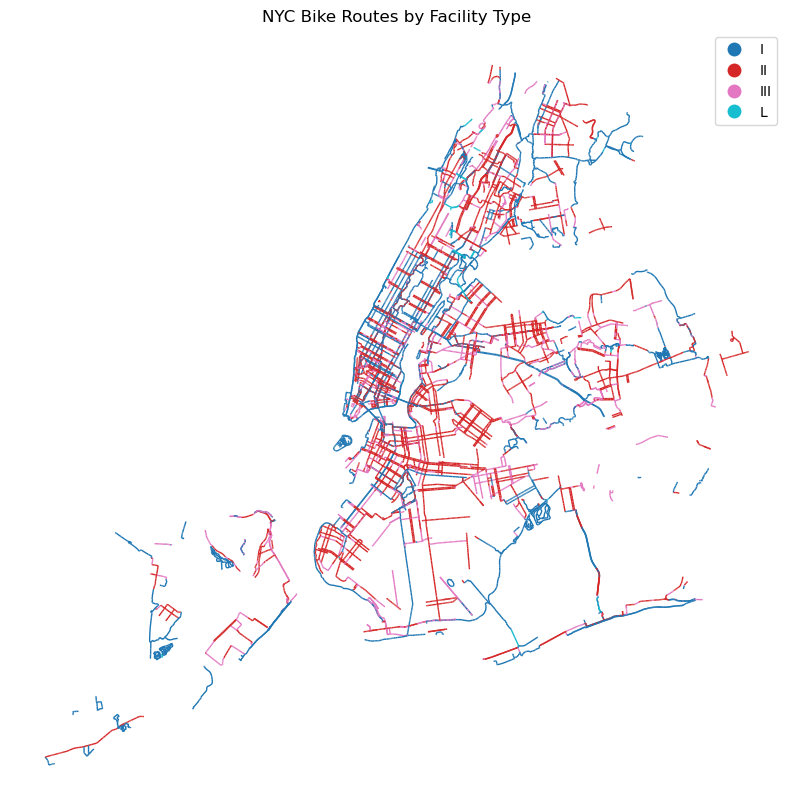

In [10]:
fig, ax = plt.subplots(figsize=(12,10))
gdf.plot(ax=ax, column=facility_col, legend=True, linewidth=1)
ax.set_title("NYC Bike Routes by Facility Type")
ax.set_axis_off()
plt.show()


## Borough breakdown (optional)
Notes: Coverage can vary by borough, so I compare total miles by borough.


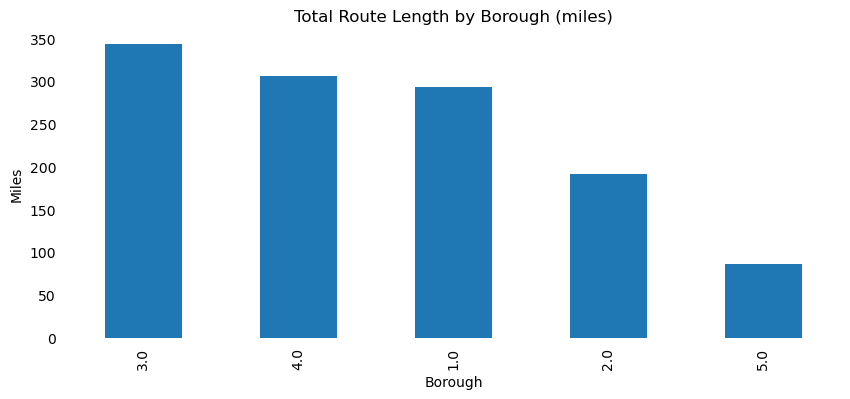

In [11]:
length_miles_by_boro = (gdf_ft.length/5280).groupby(gdf[borough_col]).sum().sort_values(ascending=False)
length_miles_by_boro.plot(kind="bar", figsize=(10,4))
plt.title("Total Route Length by Borough (miles)")
plt.xlabel("Borough"); plt.ylabel("Miles")
plt.show()


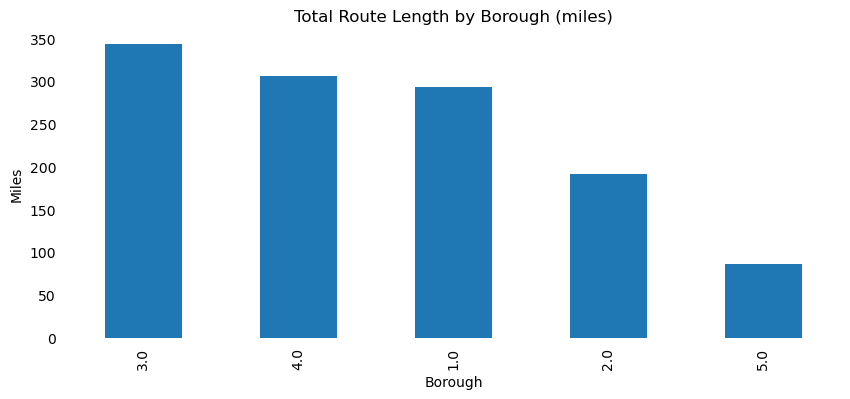

In [12]:
length_miles_by_boro = (gdf_ft.length/5280).groupby(gdf[borough_col]).sum().sort_values(ascending=False)
length_miles_by_boro.plot(kind="bar", figsize=(10,4))
plt.title("Total Route Length by Borough (miles)")
plt.xlabel("Borough"); plt.ylabel("Miles")
plt.show()


## Reflection, what these attributes can and cannot tell me
Why these attributes? Facility type summarizes 
infrastructure design; borough is a simple proxy for geographic distribution. Together they give a quick read on what exists and where.
- What they show (numeric/graphical): counts + miles reveal composition and extent; the map shows clusters/corridors/gaps that tables don’t.
- What they cannot tell: safety/comfort (traffic stress, speed), temporal change, quality/maintenance.

Next steps: join with crash data or LTS; time‑series of network growth; 5–10 minute bikeshed access around campuses/job centers.
